In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [4]:
df.dropna(how='any',inplace=True)

In [5]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,precision_score,recall_score,plot_precision_recall_curve,plot_roc_curve
def report(classifier):
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    display = ConfusionMatrixDisplay(cm,display_labels=classifier.classes_)
    display.plot()
    print(f"Accuracy:  {accuracy_score(y_test,y_pred)}")
    print(f"Precision Score:  {precision_score(y_test,y_pred)}")
    print(f"Recall Score:  {recall_score(y_test,y_pred)}")
    plot_precision_recall_curve(classifier,x_test,y_test)
    plot_roc_curve(classifier,x_test,y_test)

    

### K-Nearest Neighbours Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

Accuracy:  0.8747099767981439
Precision Score:  0.7613065326633166
Recall Score:  0.8189189189189189


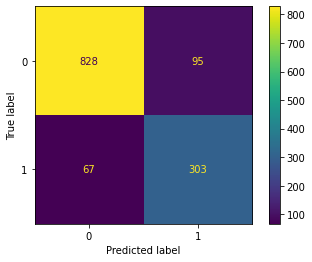

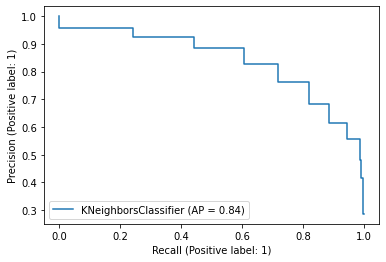

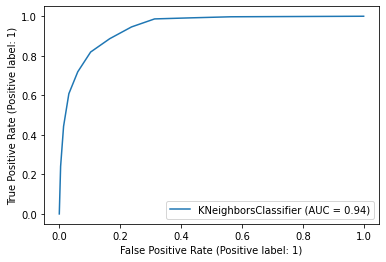

In [10]:
report(kNN)

In [11]:
from sklearn.svm import SVC
svm = SVC(gamma='auto',random_state=10)
svm.fit(x_train,y_train)

SVC(gamma='auto', random_state=10)

Accuracy:  0.9071925754060325
Precision Score:  0.9006410256410257
Recall Score:  0.7594594594594595


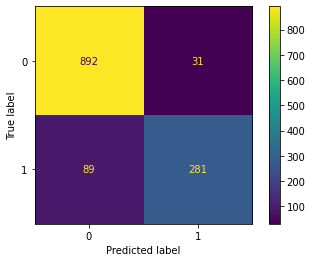

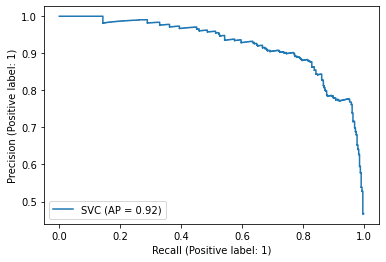

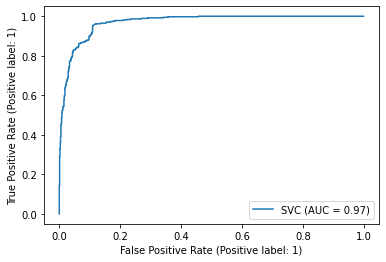

In [12]:
report(svm)